In [1]:
#Optimisation Code Translation - Engine Data
#Necessary Imports
import csv
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ggplot import *

In [73]:
# Importing data
os.chdir("D:/Shivani Chander/GyanData/Optimisation")

engineTrain = pd.read_csv('engineTest.csv')
engineTest = pd.read_csv('engineTestCheck.csv') 


In [3]:
# THIS EXAMPLE ONLY USES THE FIRST TWO VARIABLES X1 and X2 FOR
# OPTIMIZATION IN ORDER TO DEMONSTRATE THE RESULTS GRAPHICALLY
# Creating a new data frame - a subset of engineTrain to work with 
engineTrain2 = engineTrain[['X1', 'X2', 'Result']].copy()
engineTrain2['X0'] = 1 # Adding a column for the intercept
cols = engineTrain2.columns.tolist()
engineTrain2 = engineTrain2[[cols[-1]] + cols[:-1]] 
print(engineTrain2)

    X0     X1     X2 Result
0    1  57.00  65.00   Pass
1    1  57.00  64.94   Pass
2    1  22.00  13.00   Fail
3    1  26.87  14.19   Fail
4    1  57.50  63.95   Pass
5    1  56.99  65.00   Pass
6    1  23.00  13.74   Fail
7    1  57.28  65.00   Pass
8    1  24.49  15.39   Fail
9    1  21.00   9.06   Fail
10   1  23.00  13.00   Fail
11   1  57.00  65.00   Pass
12   1  57.00  67.80   Pass
13   1  57.00  66.39   Pass
14   1  23.00  13.00   Fail
15   1  23.00   5.00   Fail
16   1  23.00  13.00   Fail
17   1  20.11  13.00   Fail
18   1  24.08  16.06   Fail
19   1  23.60  20.00   Fail
20   1  23.00  13.00   Fail
21   1  55.72  65.00   Pass
22   1  58.32  65.33   Pass
23   1  25.00  13.00   Fail
24   1  57.00  65.00   Pass
25   1  57.00  65.00   Pass
26   1  27.00  11.13   Fail
27   1  20.00  13.41   Fail
28   1  57.00  65.00   Pass
29   1  30.00  18.44   Fail
..  ..    ...    ...    ...
70   1  58.56  65.00   Pass
71   1  23.00  12.87   Fail
72   1  58.13  65.00   Pass
73   1  57.00  63.07

In [5]:
# n_k is the variable created, will finally be equation of the 
# perceptron line.
n_k=[[10],[10],[10]]
# n_kprev is created to enable updates to the n_k value in the loop
n_kprev=[[0],[0],[0]]
cLearn=0.1  # step length
updateCounter = 1 #variable is created to verify if all samples meet classification criteria 
maxIteration = 2000
iteration = 1

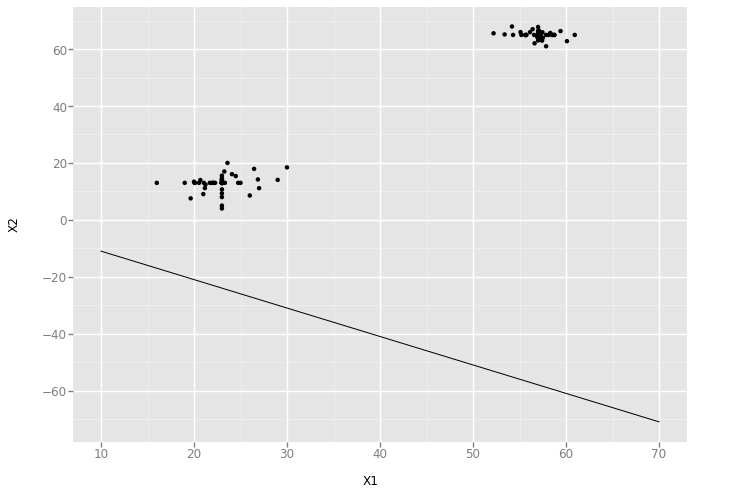

<ggplot: (10849233)>


In [6]:
myplot= ggplot(engineTrain2, aes('X1', 'X2')) + \
geom_point(colour='Result') 
myplot = myplot + geom_abline(slope = -1*n_k[1][0]/n_k[2][0], intercept = -1*n_k[0][0]/n_k[2][0])
print(myplot)
#Give limits to axes units(coord_fixed)
#Why isn't colour coming


In [8]:
engineTrain2_m = engineTrain2.as_matrix()

while(updateCounter and iteration < maxIteration):
    updateCounter = 0
      
    for i in range (0,99) :
        n_kprev = n_k # assignment of initial guess to the previous value for gradient search algorithm
        pred = np.dot(engineTrain2_m[i,0:3],n_k)
        print(pred)
        if(engineTrain2_m[i][3] == "Pass" and pred[0] < 0):
            #This condition checks if the "passed" samples are classified properly
            n_k[0][0] = n_kprev[0][0] + cLearn * engineTrain2_m[i][0] 
            n_k[1][0] = n_kprev[1][0] + cLearn * engineTrain2_m[i][1] 
            n_k[2][0] = n_kprev[2][0] + cLearn * engineTrain2_m[i][2] 
            updateCounter = 1 
        elif(engineTrain2_m[i][3] == "Fail" and pred[0] > 0):
            #This condition checks if the "failed" samples are classified properly
            n_k[0][0] = n_kprev[0][0] - cLearn * engineTrain2_m[i][0] 
            n_k[1][0] = n_kprev[1][0] - cLearn * engineTrain2_m[i][1] 
            n_k[2][0] = n_kprev[2][0] - cLearn * engineTrain2_m[i][2] 
            updateCounter = 1 #updated counter changed to true to reflect the fact that perceptron equation was modified.
        '''
        if((i+1) % 15 == 0 and iteration <= 2):
            myplot = ggplot(engineTrain2, aes(x = 'X1', y = 'X2')) + \
            geom_point(aes(colour = 'Result')) + \
            coord_fixed(xlim = c(0,75),ylim = c(0,75))
            myplot = myplot + geom_abline(slope = -1*n_k[1]/n_k[2],
            intercept = -1*n_k[0]/n_k[2])
            print(myplot)
       '''
    print(iteration)
    iteration = iteration + 1
           

[1230.0]
[1229.4]
[360.0]
[342.939]
[769.4174499999999]
[774.4548699999999]
[227.43993999999998]
[554.7836399999999]
[169.49909999999994]
[56.81807999999998]
[14.577999999999967]
[-80.12200000000018]
[691.6315999999998]
[679.4181799999999]
[160.37799999999996]
[31.581999999999965]
[30.97799999999996]
[-23.78996000000005]
[-27.557160000000053]
[-3.1296000000000816]
[-38.922000000000054]
[78.98007999999982]
[67.20193999999975]
[-49.39400000000006]
[72.27799999999985]
[72.27799999999985]
[-70.26694000000009]
[-20.933580000000063]
[72.27799999999985]
[-45.31672000000006]
[-28.764160000000047]
[72.27799999999985]
[103.45467999999983]
[69.20099999999985]
[64.42399999999981]
[82.28407999999979]
[-31.69140000000006]
[-33.360000000000056]
[81.7027999999998]
[74.52947999999981]
[58.846899999999835]
[80.59145999999981]
[78.84927999999985]
[-38.922000000000054]
[-35.09972000000005]
[92.07313999999985]
[-38.588280000000054]
[-26.04144000000005]
[-40.59752000000006]
[-33.10272000000006]
[-51.6419400

In [9]:
# The testing dataset is now projected onto the final perceptron
# classifier and few misclassifications are observed

# This reflects the lack of robustness in the algorithm as compared
# to the clasifier arrived at using linear algebra.
engineTest2 = engineTest[['X1', 'X2']].copy()
engineTest2['X0'] = 1
colts = engineTest2.columns.tolist()
engineTest2 = engineTest2[[colts[-1]] + colts[:-1]] 
print (engineTest2)


   X0     X1     X2
0   1  53.32  65.00
1   1  57.00  68.13
2   1  57.00  65.00
3   1  24.18  10.85
4   1  23.00  14.78
5   1  23.00  12.00
6   1  57.00  63.05
7   1  55.77  65.00
8   1  17.11  15.00
9   1  23.00  11.85


In [76]:
engineTest2_m = engineTest2.as_matrix()
#print (engineTest2_m)
print (n_k)
testResult2 = np.dot(engineTest2_m, n_k)
print (testResult2)
#CREATE NEW COLUMN FOR PREDICTED RESULT
X=['','','','','','','','','','']

for i in range (0,10) :
    if(testResult2[i]>0) :
        X[i]='Pass'
    else:
        X[i]='Fail'
print(X)
Xarray = np.asarray(X) 
print (Xarray)
print (Xarray.shape)
print(engineTest2_m.shape)
#print(Xarray)
engineTest2_m = np.hstack((engineTest2_m,Xarray))

[[9.200000000000003], [-5.236000000000002], [5.561999999999999]]
[[ 91.54648]
 [ 89.68706]
 [ 72.278  ]
 [-57.05878]
 [-29.02164]
 [-44.484  ]
 [ 61.4321 ]
 [ 78.71828]
 [  3.04204]
 [-45.3183 ]]
['Pass', 'Pass', 'Pass', 'Fail', 'Fail', 'Fail', 'Pass', 'Pass', 'Pass', 'Fail']
['Pass' 'Pass' 'Pass' 'Fail' 'Fail' 'Fail' 'Pass' 'Pass' 'Pass' 'Fail']
(10,)
(10, 3)


ValueError: all the input arrays must have same number of dimensions

In [72]:
print ("Engine Prediction ")
for i in range (0,10):
    print(engineTest['Engine'][i],X[i])

Engine Prediction 
FD01 Pass
FD02 Pass
BM01 Pass
FD03 Fail
BM02 Fail
BM03 Fail
FD04 Pass
FD05 Pass
BM04 Pass
BM05 Fail


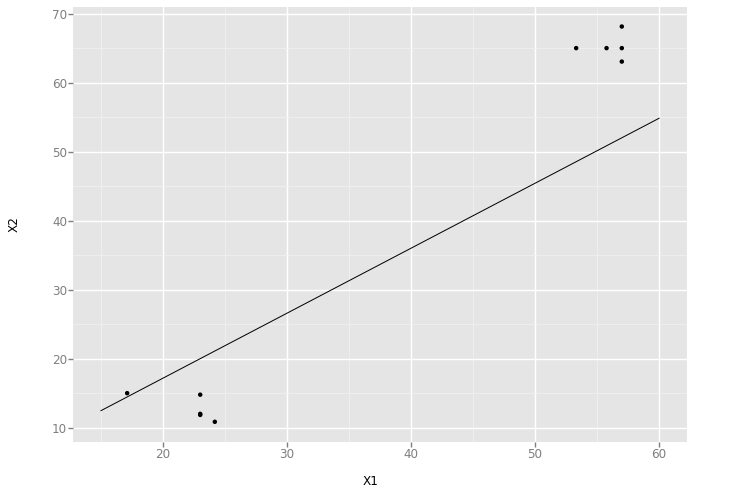

<ggplot: (1011465)>


In [49]:
myplot = ggplot(engineTest2, aes(x = 'X1', y = 'X2')) + \
geom_point(colour = 'steelblue')
myplot = myplot + geom_abline(slope = -1*n_k[1][0]/n_k[2][0], intercept = -1*n_k[0][0]/n_k[2][0])

print(myplot)